### набор данных для бинарной классификации - платежеспособный клиент или нет

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

#### сделать обзорный анализ выбранного датасета

#### Информация об атрибутах:

В этом исследовании в качестве переменной ответа использовалась двоичная переменная, платеж по умолчанию (Да = 1, Нет = 0). В этом исследовании был проведен обзор литературы и использованы следующие 23 переменных в качестве объясняющих переменных:

X1: Сумма данного кредита (NT-доллар): он включает как индивидуальный потребительский кредит, так и его / ее семейный (дополнительный) кредит.

X2: Пол (1 = мужской; 2 = женский).

X3: Образование (1 = аспирантура; 2 = университет; 3 = средняя школа; 4 = другие).

X4: Семейное положение (1 = женат; 2 = холост; 3 = другие).

X5: Возраст (год).

X6 - X11: История прошлых платежей. Мы отслеживали прошлые ежемесячные платежи (с апреля по сентябрь 2005 г.) следующим образом: X6 = статус погашения в сентябре 2005 г .; X7 = статус погашения в августе 2005 г .; . . .;
X11 = статус погашения в апреле 2005 г. Шкала измерения статуса погашения: -1 = надлежащая оплата; 1 = отсрочка платежа на один месяц; 2 = отсрочка платежа на два месяца; . . .; 8 = отсрочка платежа на восемь месяцев; 9 = отсрочка платежа от девяти месяцев.

X12-X17: Сумма выписки по счету (NT-доллар). 
X12 = сумма выписки по счету за сентябрь 2005 г
X13 = сумма выписки по счету за август 2005 г 
X17 = сумма выписки по счету за апрель 2005 г

X18-X23: сумма предыдущего платежа (доллар NT).
X18 = сумма, выплаченная в сентябре 2005 г .
X19 = сумма, выплаченная в августе 2005 г .
X23 = сумма, выплаченная в апреле 2005 г.

In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv(r'C:\Users\nikita.saprykin\Desktop\Машинное обучение в бизнесе\lection6_materials\default of credit card clients.csv', sep=";",header=1 )

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [5]:
df.shape

(30000, 25)

25 Признаков, 1 целевая переменная - будет совершен платеж или нет. Всего 30000 записей

In [6]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [7]:
df = df.drop(df.loc[(df['LIMIT_BAL']>=1000000),:].index,axis=0)
df = df.drop(df.loc[(df['EDUCATION'].isin([6,5,0])),:].index,axis=0)

df.reset_index(drop=True, inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29649,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29650,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29651,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29652,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


#### Разбиение выборки на тестовую и тренировочную

Целевая переменная y - определить платежеспособен клиент или нет.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['ID','default payment next month'], axis=1), 
                                                    df['default payment next month'], test_size=0.35)

In [9]:
X_test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
5734,60000,2,3,2,45,0,0,0,0,0,...,40056,39996,40261,32644,1726,1502,1287,1322,1179,1156
28900,50000,1,2,2,23,0,0,0,0,0,...,24870,18740,17861,17433,1497,1609,1279,1500,0,637
10253,20000,1,2,2,57,0,0,0,0,0,...,19486,19501,19274,19703,3000,1500,1600,900,900,600
26580,280000,1,1,2,35,0,0,0,0,0,...,146652,132527,70421,60235,10299,7200,5886,3000,5000,5000
6599,80000,2,2,2,40,0,0,0,0,0,...,31923,25885,20195,19494,1728,1411,1009,605,2012,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,530000,1,1,2,32,-2,-2,-1,0,0,...,15688,24511,12144,34963,24120,15791,12808,8090,34110,90231
17009,150000,2,3,2,28,-1,0,0,0,0,...,36343,45180,45694,45694,1588,1971,20000,914,0,1746
27929,160000,2,1,1,41,-1,-1,-1,-1,-1,...,1080,0,40100,18899,7944,1080,0,40100,18899,4180
25820,250000,2,2,1,39,-1,-1,-1,-1,-1,...,1222,7337,0,2752,0,1222,7409,0,2752,1549


In [10]:
# Стандартизация признаков
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [11]:
X_train_scaled

array([[-6.74120839e-01,  8.14997142e-01,  1.66083671e+00, ...,
        -2.99531550e-01, -5.62476426e-02, -2.91505662e-01],
       [-1.05797374e+00, -1.22699817e+00,  2.58680537e-01, ...,
        -2.51111808e-01, -3.10997190e-01, -2.02681536e-01],
       [-1.05797374e+00,  8.14997142e-01, -1.14347563e+00, ...,
        -2.99531550e-01, -3.10997190e-01, -1.63820980e-01],
       ...,
       [ 7.07749595e-01,  8.14997142e-01, -1.14347563e+00, ...,
         9.52103948e-02, -3.10997190e-01,  3.83455828e-03],
       [ 9.35849577e-02, -1.22699817e+00, -1.14347563e+00, ...,
        -1.78482196e-01, -5.62476426e-02, -1.80475504e-01],
       [ 3.01086699e+00, -1.22699817e+00, -1.14347563e+00, ...,
         2.61999731e+00,  4.40276105e+00,  7.87874020e-01]])

In [35]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(iterations=5,
                           depth=5,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)

cat_model.fit(X_train_scaled, y_train)

y_predict = cat_model.predict(X_test_scaled)

0:	learn: 0.4466533	total: 10.6ms	remaining: 42.3ms
1:	learn: 0.4397828	total: 23.3ms	remaining: 34.9ms
2:	learn: 0.4343877	total: 54.2ms	remaining: 36.1ms
3:	learn: 0.4301907	total: 74.1ms	remaining: 18.5ms
4:	learn: 0.4282617	total: 88.4ms	remaining: 0us


In [36]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score
from sklearn.metrics import accuracy_score
def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0)) 
    return [f1,roc,rec,prc]

print(f"Accuracy_score: {round(accuracy_score(y_test, y_predict)*100,2)}%")

result= evaluate_results(y_test, y_predict)
result.append('step4')
A = pd.DataFrame([result],columns=['f1', 'roc', 'recall', 'precision','Model'])
A['Accuracy_score'] = round(accuracy_score(y_test, y_predict)*100,2)

Accuracy_score: 81.93%
Classification results:
f1: 49.34%
roc: 66.77%
recall: 39.35%
precision: 66.11%


#### разобраться с SHAP и построить важности признаков

In [38]:
from catboost import CatBoostClassifier
import shap

# load JS visualization code to notebook
shap.initjs()

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidfVectorizer
import itertools

import matplotlib.pyplot as plt

%matplotlib inline

In [41]:
model = CatBoostClassifier(iterations=5,
                           depth=5,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)


model.fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

0:	learn: 0.4466533	total: 9.54ms	remaining: 38.1ms
1:	learn: 0.4397828	total: 18.4ms	remaining: 27.6ms
2:	learn: 0.4343877	total: 24.5ms	remaining: 16.3ms
3:	learn: 0.4301907	total: 31.9ms	remaining: 7.97ms
4:	learn: 0.4282617	total: 38.4ms	remaining: 0us


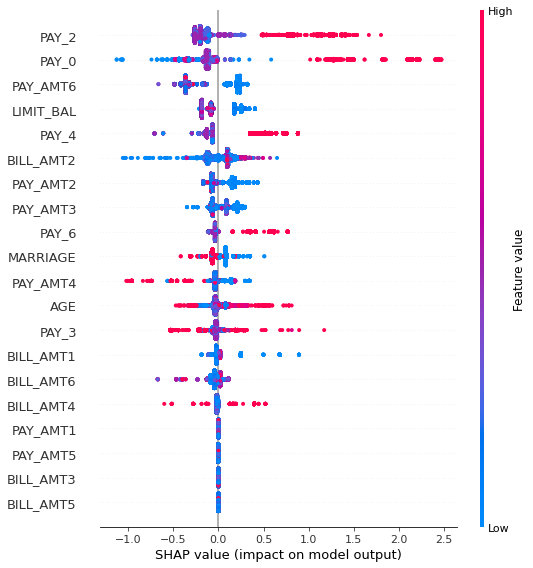

In [43]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

Из графика видно, что в пользу выплат влияют фичи:
PAY0 = статус погашения в сентябре 2005 г .; PAY2 = статус погашения в августе 2005 г  и т.д. При этом клас 1 говорит о платеже, 0 об его отсутствии. Здесь основным фактором неплатежей является накопление отсрочки платежей за предыдущие периоды от 5 месяцев. Те кто находится в браке менее подвержен просрочке платежей в отличии от холостых. Молодые менее склонны к просрочке платежей. Размер выплаты предыдущего платежа также влияет на вероятность просрочки.Помимо этого размер текущего баланса также влияет на вероятность просрочки, чем больше баланс, тем ниже вероятность просрочки


In [48]:
n_u = int(shap_values.shape[0]*.1)
shap_values[:n_u,:].shape, 
shap_values[:n_u,:].shape, X_train.shape

((1927, 23), (19275, 23))

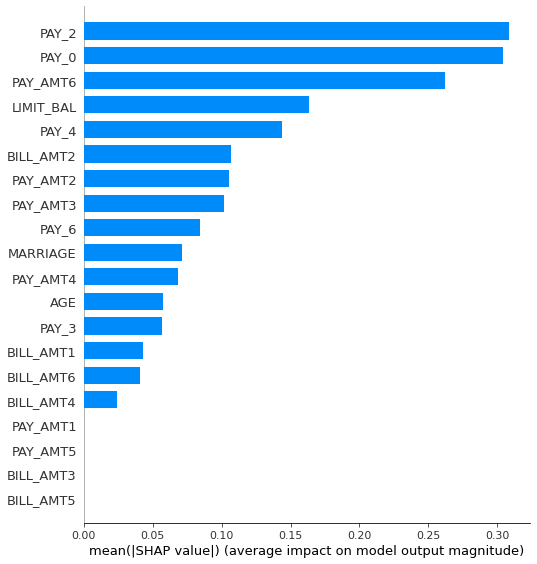

In [49]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

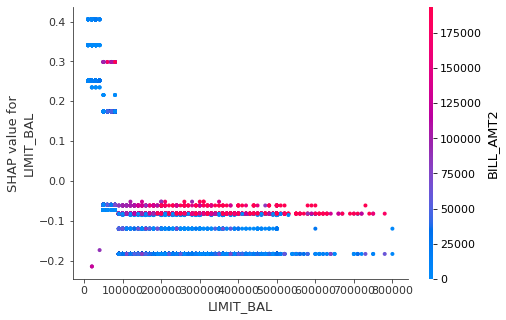

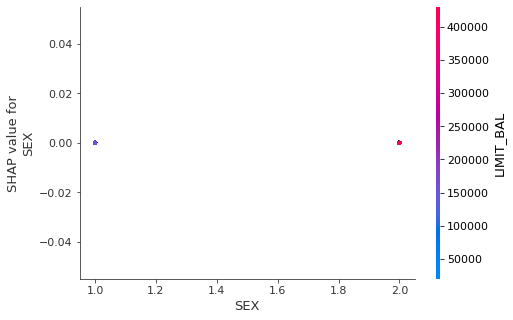

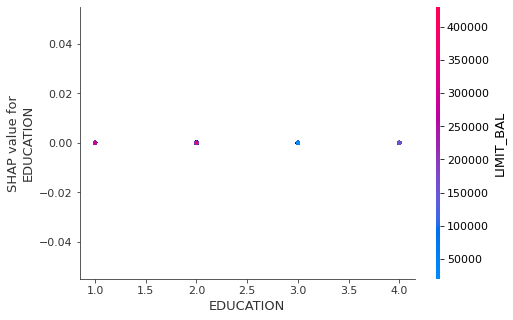

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


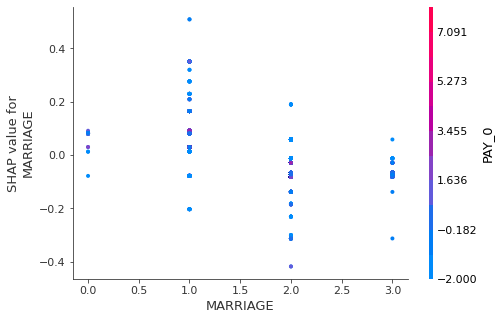

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


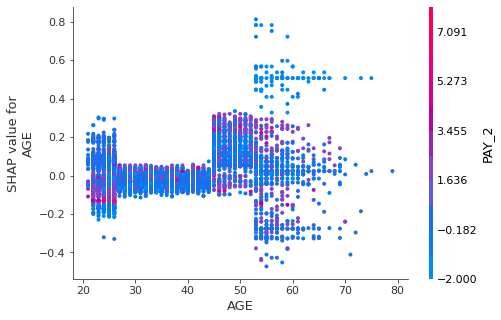

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


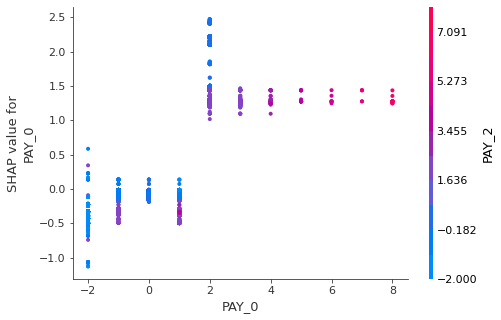

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


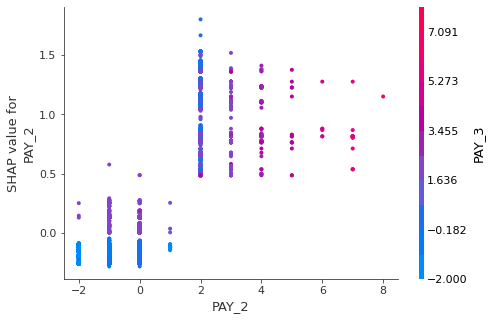

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


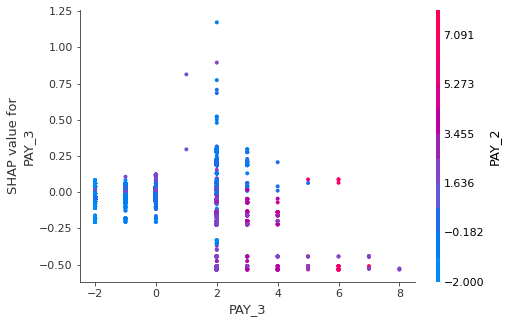

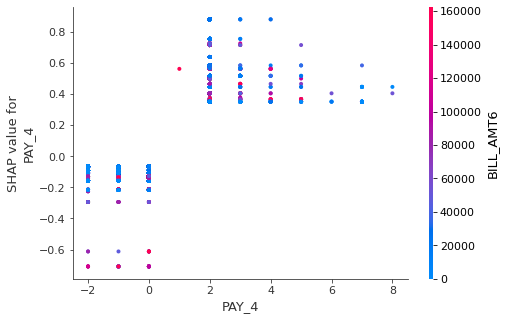

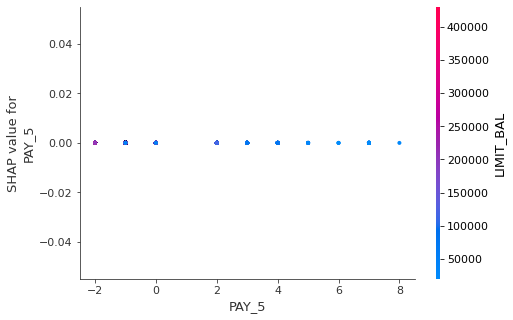

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


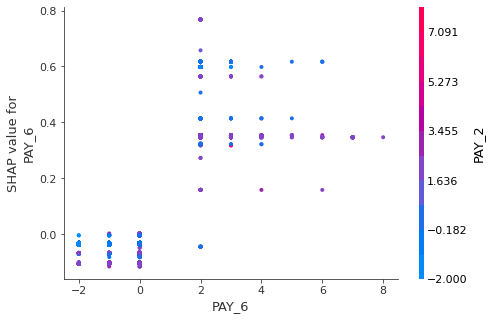

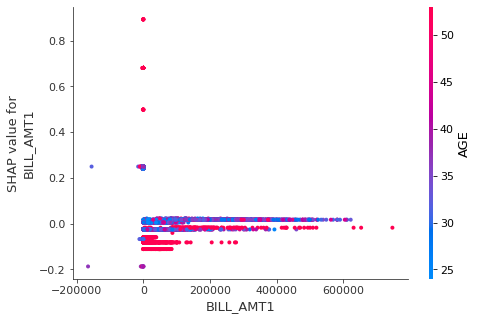

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


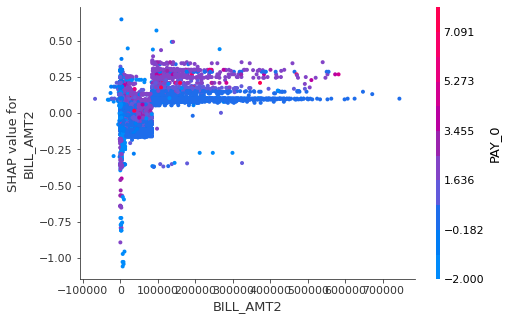

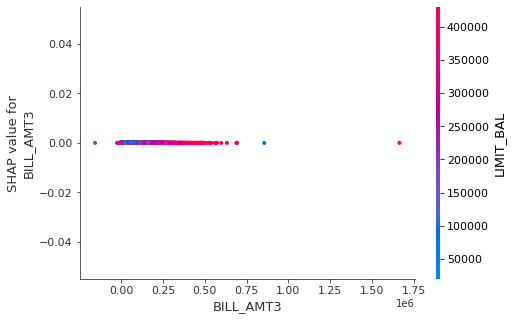

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


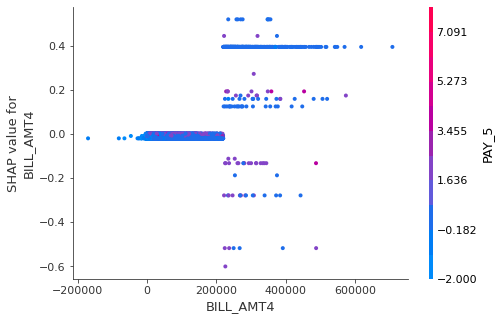

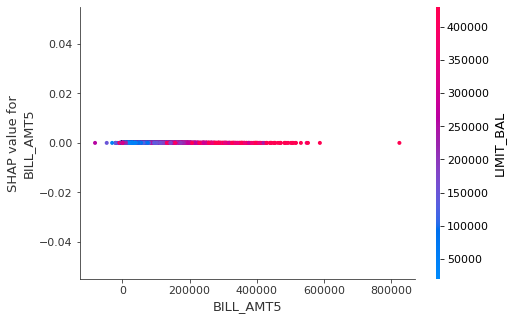

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


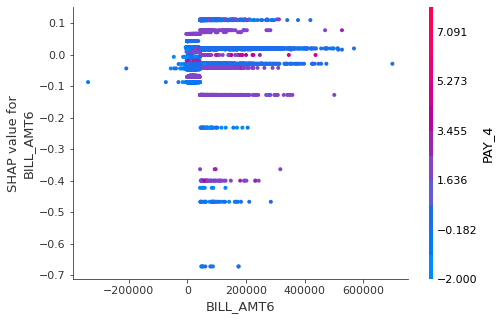

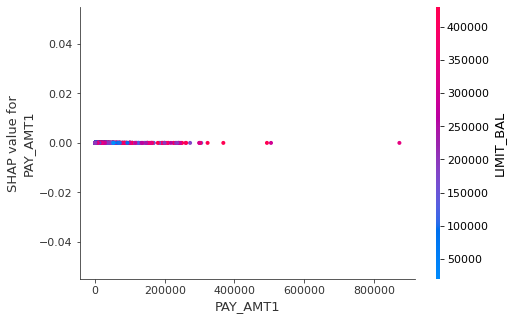

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


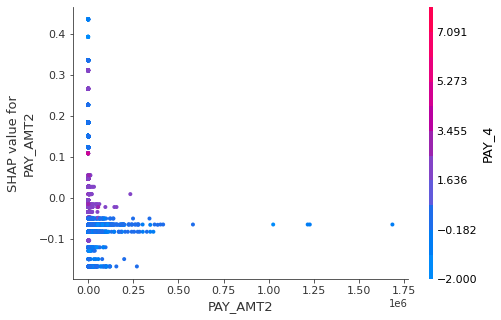

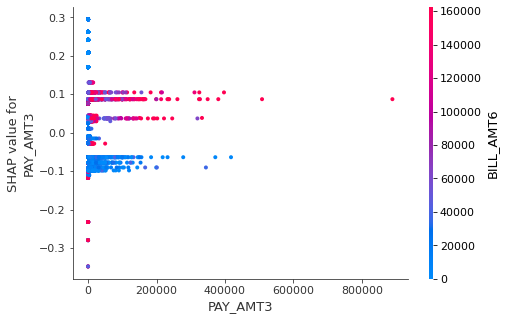

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


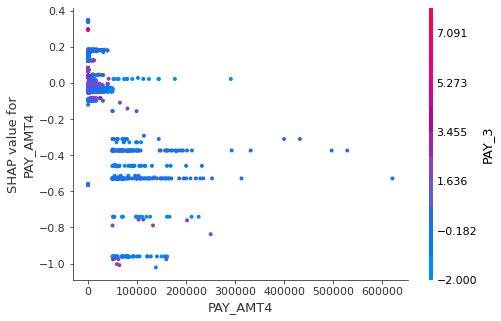

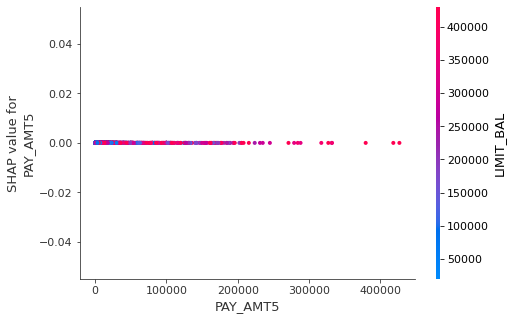

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


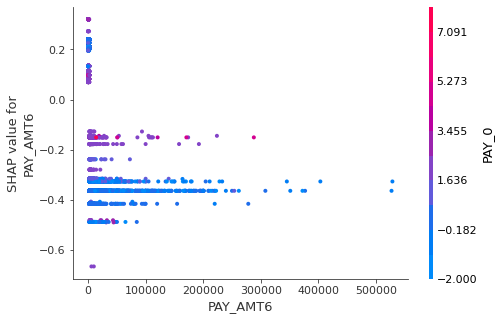

In [50]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_train)

#### для отдельных наблюдений вывести force_plot и попытаться проинтерпретировать результат

In [51]:
shap.force_plot(explainer.expected_value, shap_values[1,:], X_train.iloc[1,:])